# Importing Libraries

In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
from librosa.feature import melspectrogram
from librosa.util import normalize
from librosa.display import waveplot

# Setting Directory variables

In [2]:
## Data library

dryCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Dry_cough/'
wetCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Wet_cough/'

# Functions

## Read Cough Data

In [3]:
#Read original data

def readCoughData(file):
    origData,origSampFreq = librosa.load(file, sr=None)
    return origData, origSampFreq

## Resample sound array

In [4]:
# resample original data to 16000 Khz

def resample(originalData, origSampFreq, targetSampFreq):
    resampledData = librosa.resample(y=origData, orig_sr=origSampFreq, target_sr=targetSampFreq)
    return resampledData

## Normalize Sound Array

In [5]:
# Normalize Sound Data

def normalizeSound(resampledData, axis):
    """ Axis is 0 for row-wise and 1 
    for column wise"""
    normalizedData = normalize(resampledData, axis)
    return normalizedData

## Calculate Mel-Spectrum

In [51]:
# Calculate Mel-Spectogram

def calculateMelSpectogram(normalizedData, hop_length, win_length, sr):
    #newSamplingFreq = 16000
    S=librosa.feature.melspectrogram(normalizedData, sr=sr, hop_length=hop_length, win_length=win_length)
    return S

## Plotting Sound Data

In [7]:
# plot orginal time domain data

def plotSound(soundData, sr, x_axis_string):
    waveplot(soundData, sr, x_axis=x_axis_string)

## Plotting Mel-Spectogram

In [8]:
#Plot melspectogram

def plotMelSpectogram(S, sr, ref=np.max):
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=16000,)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

# Combining all the functions above to create a single function

## Setting Target sampling frequency

I decide to set target sampling frequency to 16000 for cough 

In [13]:
targetSampFreq = 16000

In [30]:
def featureExtraction(audioFile, targetSampFreq, axis, hop_length,win_length):
    origData, origSampFreq = readCoughData(audioFile)
    resampledData = resample(origData, origSampFreq, targetSampFreq=targetSampFreq)
    normalizedData = normalizeSound(resampledData, axis=axis)
    S = calculateMelSpectogram(normalizedData, hop_length, win_length, sr=targetSampFreq)
    plotSound(soundData=normalizedData, sr=targetSampFreq,x_axis_string='time')
    plotMelSpectogram(S, sr=targetSampFreq, ref=np.max)

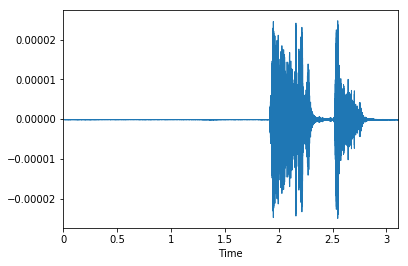

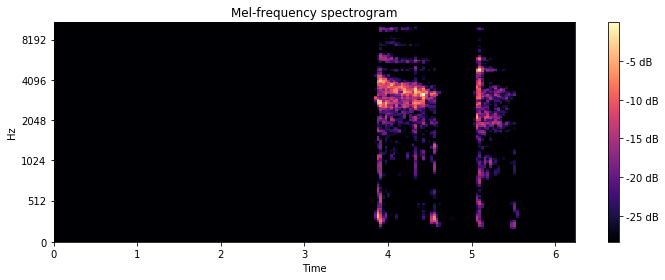

In [31]:
featureExtraction(audioFile=wetCoughData+'Wet cough 32.m4a', targetSampFreq=16000,axis=0,hop_length=256, win_length=512)

In [56]:
import tensorflow as tf
import h5py
import numpy as np
import pandas as pd
from tensorflow.python.keras import backend as K
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Activation, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop

In [59]:
def cough_detection_model():
    input_layer = Input((432,228,1))
    x = MaxPooling2D(pool_size=(2, 2))(input_layer)
    x = Conv2D(filters=32,kernel_size=(5,5),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=32,kernel_size=(5,5),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(input_layer)
    x = Flatten()(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(2,activation = 'softmax')(x)
    model = Model(inputs=input_layer,outputs=output_layer)
    adam = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [63]:
S.shape

(128, 98)